# Identify Engagement Profiles

## Step 1 - Choose the Engagement Measures in DMHI
Choosing the most apporpriate engagement measures for the intervention happens iteratively in discussions with the whole trial team. This step should occur at the **Design Stage** of the trial, so you may not have data to assess during these discussions. However, you and the trial team might have data on participant activity from previous development work or during a feasibility study or external pilot. In these situations it is useful to explore and visualise data from the available Engagement Measures. Below is a couple of examples, using the COPe-Support case study, of how you might explore the engagement measures in the intervention. This descriptive assessment is helpful to determine which measures actively assess participant engagement and is also helpful when defining the list of engagement indicator variables. 

In our case study, COPe-Support, there were two datasets that captured engagement measures from the intervention:
 - Summary - measures of the total activity of a participant in the intervention
 - Weekly - measures that captured the weekly activity of participants in the intervention 

 **Note - All data has been anonymised in this dataset

#### 1. Summary Measures

In [1]:
qui do Folders // Load Folder Global Macros
qui cd "$RAW"

use summary, clear
describe


Contains data from summary.dta
 Observations:           204                  
    Variables:            11                  27 Aug 2025 16:25
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
ID              long    %10.0g                Participant Identifier
cohort          float   %9.0g                 Study Cohort
activated       float   %9.0g      status     Activation Status
totalmins       double  %10.0g                Total activity (minutes)
logindays       byte    %10.0g                No of login on different days
loginwks        byte    %10.0g                No of weeks with login
pageviews       int     %10.0g                Page view
posts           byte    %10.0g                Post on forums
ptp             float   %9.0g                 Peer to Peer Posts
ate  

In [2]:
%head

,ID,cohort,activated,totalmins,logindays,loginwks,pageviews,posts,ptp,ate,totaldays
1,1,1,1,3,1,1,1,0,0,0,18
2,4,6,1,176.91667,.,6,206,2,0,2,93
3,8,2,1,4.95,1,1,4,0,0,0,10
4,11,3,1,243.75,24,12,403,5,0,5,94
5,13,6,1,44.783333,.,2,308,0,0,0,21


#### 2. Weekly Measures

In [3]:
use weekly, clear
describe


Contains data from weekly.dta
 Observations:         3,672                  
    Variables:             9                  27 Aug 2025 16:25
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
ID              long    %10.0g                
activated       float   %9.0g      act        Activation Status
cohort          float   %9.0g                 Study Cohort
week            byte    %10.0g                Week of Study
wkpv            int     %10.0g                Page Views for Week
wkpost          byte    %10.0g                Posts on forum for Week
ate             byte    %10.0g                Ask the Expert Posts
ptp             byte    %10.0g                Peer to Peer Posts
totrow          float   %9.0g                 
---------------------------------------------------

In [4]:
%head

,ID,activated,cohort,week,wkpv,wkpost,ate,ptp,totrow
1,1,1,1,1,1,0,0,0,18
2,1,1,1,2,0,0,0,0,18
3,1,1,1,3,0,0,0,0,18
4,1,1,1,4,0,0,0,0,18
5,1,1,1,5,0,0,0,0,18


### Tabulations of Data


Summary for variables: activated
Group variable: cohort (Study Cohort)

  cohort |      Mean        SD       p50       IQR       Min       Max
---------+------------------------------------------------------------
       1 |      0.90      0.31      1.00      0.00      0.00      1.00
       2 |      0.88      0.33      1.00      0.00      0.00      1.00
       3 |      0.86      0.35      1.00      0.00      0.00      1.00
       4 |      0.95      0.23      1.00      0.00      0.00      1.00
       5 |      0.67      0.48      1.00      1.00      0.00      1.00
       6 |      0.89      0.31      1.00      0.00      0.00      1.00
---------+------------------------------------------------------------
   Total |      0.86      0.35      1.00      0.00      0.00      1.00
----------------------------------------------------------------------

Summary for variables: totalmins
Group variable: cohort (Study Cohort)

  cohort |      Mean        SD       p50       IQR       Min       Max
--

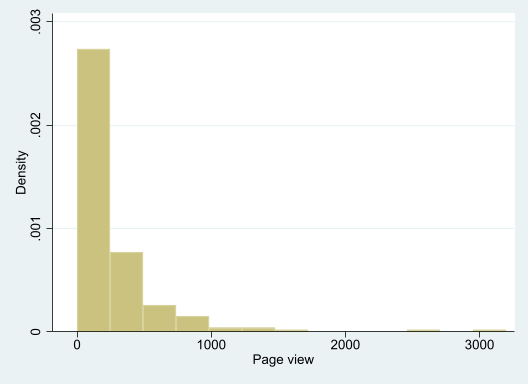

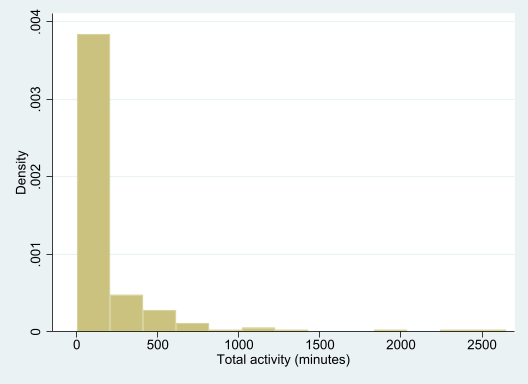

In [5]:
use summary, clear

* ------------------------------------
* Summarise Variables
* ------------------------------------

* Summary of Variables Collected
tabstat activated ,  s(mean sd median iqr min max) by(cohort) format(%4.2f)
tabstat totalmins , s(mean sd median iqr min max) by(cohort) format(%4.2f)
tabstat logindays , s(n mean sd median iqr p25 p75 min max) by(cohort) format(%4.2f)
tabstat loginwks  , s(mean sd median iqr min max) by(cohort) format(%4.2f)
tabstat pageviews , s(mean sd median iqr min max) by(cohort) format(%4.2f)
tabstat totaldays , s(mean sd median iqr min max) by(cohort) format(%4.2f)

* Posts to each Discussion Forum
tabstat ptp , s(mean sd median iqr min max) format(%4.2f)
tabstat ate , s(mean sd median iqr min max) format(%4.2f)

* Histograms
hist pageviews , name(pgvs, replace)
hist totalmins, name(totmins, replace)

### Heatmap of Daily Activity

For the Heatmap plot you will need to install the following packages in `stata`
 - `ssc install heatplot`
 - `ssc install colrspace`
 - `ssc install palettes`

For the Heatmap plot, an event variable is needed where [1=activity that week / 0=no activity that week], then generate a heatmap to show all the events across the weeks of available data. 

The first step In the raw data, the format some participants with no activity in a given week they may not have a corresponding 

(0 observations deleted)
(2,812 missing values generated)
(j = 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18)

Data                               Long   ->   Wide
-----------------------------------------------------------------------------
Number of observations            3,672   ->   204         
Number of variables                   3   ->   19          
j variable (18 values)             week   ->   (dropped)
xij variables:
                                 active   ->   active1 active2 ... active18
-----------------------------------------------------------------------------
active1   active4   active7   active10  active13  active16
active2   active5   active8   active11  active14  active17
active3   active6   active9   active12  active15  active18
(j = 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18)

Data                               Wide   ->   Long
-----------------------------------------------------------------------------
Number of observations              204   ->   3,672   

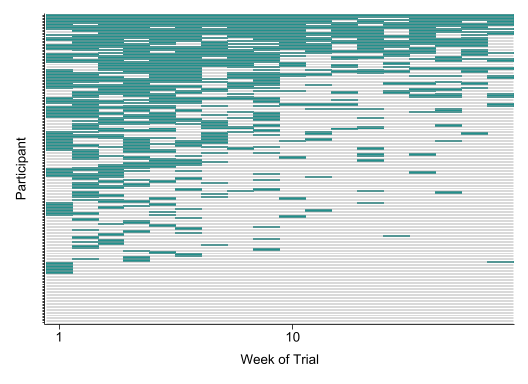

In [6]:
* ----- 1) Import the Data
use weekly , clear

* ----- 2) Filter data to keep only 1 row per participant per week
sort ID week
egen pickone = tag(ID week) 
keep if pickone 
gen active = 1 if wkpv > 0 & wkpv < . // Only keep those with non-missing data

keep ID week active

* ----- 3) Reshape Wide = generate a week for every participant including those with no data that week.
reshape wide active , i(ID) j(week)

* ----- 4) Calculate the maximum number of weeks (give us the range for the X-axis on the graph)
ds active*
local alllist = r(varlist)
local wordtotal = word("`alllist'", wordcount("`alllist'"))
if regexm("`wordtotal'", "[0-9]") local num = regexs(0)
local tot = substr("`wordtotal'", strpos("`wordtotal'", "`num'"), .)

* ----- 5) Calculate participant ID for graph
egen row_tot = rowtotal(active1-active`tot')
gsort row_tot active1-active`tot' // Sort by activity in columns so graph is highest to lowest
gen patkey = _n // Generate Y variable
local max_pat = patkey[_N]

* ----- 6) Reshape - data must be in long format for the graph 
reshape long // No parameters needed as Stata remembers them from Reshape Wide

* ----- 7) Produce Graph
if `tot' < 50 local xlab "5(5)`tot'" // if less than 50 participants graph tick on x-axis every 5
else local xlab "10(10)`tot'" // if more than 50 participants graph tick on x-axis every 10

#delimit ;
    heatplot active patkey week
        , levels(1) discrete
        ylabel(none)
        xscale(range(1(10)`tot'))
        xlabel(1 `xlab')
        xtitle("Week of Trial", m(t+2))
        ytitle("Participant" , m(r+3))
        ylabel(#10)
        plotr(style(none) margin(tiny))
        scheme(s1color)
        legend(off)
        name(heatmap, replace) ;
#delimit cr

* ----- 8) Add horizontal lines to graph so row for each participant more visible 
local bc = ", lwidth(vvthin) lcolor(gs10)" 
forvalues i = 0/`max_pat' {
	graph addplot pci `i'.5 0.5 `i'.5 `tot'.5 `bc' ylabel(none) ymtick(1(1)`max_pat') ///
		xscale(range(1(1)`tot')) xlabel(1 10(10)`tot') plotregion(margin(tiny))
}



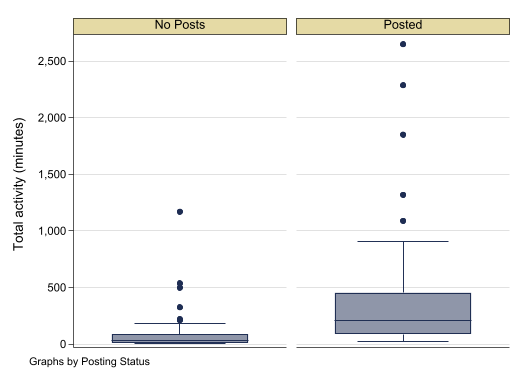

In [7]:
use summary, clear

* --- Activity by Posting Status
gen pyn = posts > 0 & posts < .
lab var pyn "Posting Status"
lab defin p 0 "No Posts" 1 "Posted"
lab values pyn p

#delimit ; 
	graph box totalmins  
	, 
	by(pyn) 
	box(1, color(dknavy)) 
	marker(1, mcolor(dknavy)) 
	ylabel( , angle(hori)) 
	plotr(style(none) margin(b=1 t=3)) 
	scheme(s1color) 
	name(boxplot, replace) 
;
#delimit cr

### Intervention Retention
Calculate the time between first and last use and plot this as retention to the COPe-Support intervention using a Kaplan-Meier plot. Additionally, the intervention retention could also be assessed across other engagement measures, as shown below. This is useful for `Step 2` when deciding how to define indicator variable measures.  

(20 real changes made)
(23 missing values generated)
(20 real changes made)

Survival-time data settings

           ID variable: ID
         Failure event: event==1
Observed time interval: (totaldays[_n-1], totaldays]
     Exit on or before: failure

--------------------------------------------------------------------------
        204  total observations
         23  event time missing (totaldays>=.)              PROBABLE ERROR
--------------------------------------------------------------------------
        181  observations remaining, representing
        181  subjects
        161  failures in single-failure-per-subject data
     12,035  total analysis time at risk and under observation
                                                At risk from t =         0
                                     Earliest observed entry t =         0
                                          Last observed exit t =       126

        Failure _d: event==1
  Analysis time _t: totaldays
       ID vari

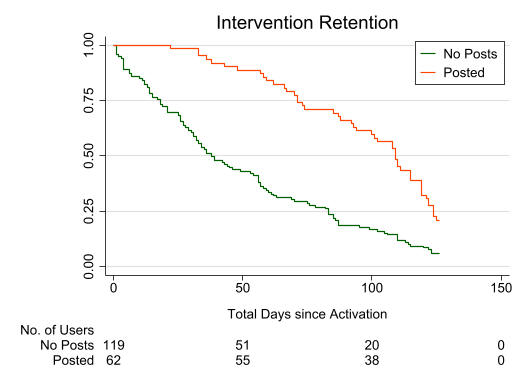

In [8]:
* ---- 1) Import the Data
use summary, clear

* ---- 2) Data Cleaning (as only looking at first 18 weeks)
replace totaldays = 126 if totaldays > 126 & totaldays < . // Official Intervention Period is 18 weeks (18*7 = 126 Days) 

* ---- 3) Generate an Event varaible 
gen event = 1 if totaldays < . // Totaldays (i.e. last day of activity for participant)
replace event = 2 if totaldays >= 126 & totaldays < . // 2 = Event is Censored

* ---- 4) Set Data as Survival to generate graph
stset totaldays , id(ID) f(event==1)

* Summary Descriptions of Data
stsum 
stdescribe
ltable totaldays event // Life Table to show events (as "deaths") 

* ----5) Generate Graph 
gen postgrp = (posts > 0 & posts < .) // Example - Generate Group Variable - Useful for when defining indicator variables
#delimit ;
    sts graph 
    , by(postgrp) 
    // Risk Table for Each level of Group Variable
    risktable(, title("No. of Users") rowtitle("No Posts") group(0))
    risktable( , rowtitle("Posted") group(1)) 
    xtitle("Total Days since Activation" , m(t+3))
    plotr(style(none)) 
    scheme(s1color) 
    title("Intervention Retention") 
    legend(order(1 "No Posts" 2 "Posted")  symx(*0.3) ring(0) pos(2) col(1))
;
#delimit cr

### Weekly Activity (based on total pageviews)
Below is a graph to visualise how weekly activity varies between groups of users that accessed different total amounts of content in the intervention. This visualisation can also be useful in `Step 2` to aid the selection of engagement indicator variables.


------------------------------------------------------------------
              |      Mean   Median   Minimum value   Maximum value
--------------+---------------------------------------------------
Week of Study |                                                   
  1           |  24.34314        0               0             422
  2           |   33.0049        0               0             627
  3           |  32.31863        0               0             980
  4           |     26.75        0               0             440
  5           |  20.68137        0               0             514
  6           |     11.25        0               0             186
  7           |  9.181373        0               0             142
  8           |  14.92647        0               0             424
  9           |  8.892157        0               0             152
  10          |  5.916667        0               0             175
  11          |  7.980392        0               0           

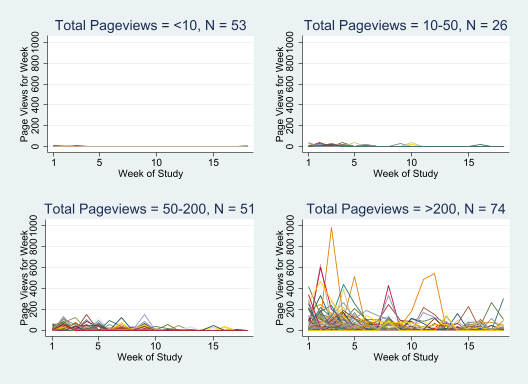

In [9]:
use weekly, clear
egen pickone = tag(ID)

* ---- 2) Tabulate Weekly Data
table week , stat(mean wkpv ) stat(median wkpv) stat(min wkpv) stat(max wkpv)

* ---- 3) Visualise Weekly Data - based on total pageviews
bysort ID: egen totwkpv = sum(wkpv)

* Divid Into Groups (tabulate first to decide groups)
gen grp = . 
replace grp = 1 if totwkpv <= 10
replace grp = 2 if totwkpv > 10 & totwkpv <= 50
replace grp = 3 if totwkpv > 50 & totwkpv <= 200
replace grp = 4 if totwkpv > 200 & totwkpv < . 

tab grp if pickone, matcell(grp) // matcell - to store later to give N in the graph

xtset ID week
local title `" "<10" "10-50" "50-200" ">200"  "' // Generate Labels for Groups

* Loop Through each grp, generate graph ready for combine
forvalues i = 1/4 {
	local gN = grp[`i', 1]
	local t : word `i' of `title'
	#delimit ;
		xtline wkpv if grp == `i' 
		, overlay 
		legend(off) 
		xlabel(1 5(5)15) 
		xscale(range(1(5)20)) 
		name(g`i', replace) // name of graph - to call for combine below
		title("Total Pageviews = `t', N = `gN'") 
		nodraw // No draw to suppress graph display (as want to show in combine below)
	;
	#delimit cr
}

* ---- 4) Combine to view result
graph combine g1 g2 g3 g4 , rows(2) ycommon